In [155]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [156]:
from sklearn.datasets import load_breast_cancer

In [157]:
data = load_breast_cancer()

In [158]:
X = data.data
Y = data.target.reshape(-1,1)
Y.shape,data.target.shape

((569, 1), (569,))

In [159]:
X_train = X[:500,:]
Y_train = Y[:500,:]
X_test = X[500:,:]
Y_test = Y[500:,:]

In [160]:
training_x = pd.DataFrame(X_train)
training_y = pd.DataFrame(Y_train)
test_x = pd.DataFrame(X_test)
test_y = pd.DataFrame(Y_test)

### **model traing**

$$\vec{x}\in\mathbb{R}^{1\times 30}$$

$$W\in\mathbb{R}^{30\times 1}$$

$$b\in\mathbb{R}$$

$$z = \vec{x}W+b$$

$$\hat{y} = \sigma(z) = \frac{1}{1+e^{-z}}$$
***********
$$Loss(w,b) = -\frac{1}{N}\sum_{i=1}^{N}[y_i\log\hat{y_i}+(1-y_i)\log(1-\hat{y_i})]$$

***********
$$k=0,1,2,...$$

$$W^{k+1}=W^{k}-\alpha_k\frac{\partial Loss(W^{k},b^{k})}{\partial W}$$

$$b^{k+1}=b^{k}-\alpha_k\frac{\partial Loss(W^{k},b^{k})}{\partial b}$$

In [161]:
w = Variable(torch.FloatTensor(np.zeros((30,1))),requires_grad=True)  #np.zeros()返回来一个给定形状和类型的用0填充的数组；
b = Variable(torch.FloatTensor(np.array([[0]])),requires_grad=True)
print("Initial value of w = ",w.T)
print("Initial value of b = ",b)

Initial value of w =  tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.]], grad_fn=<PermuteBackward>)
Initial value of b =  tensor([[0.]], requires_grad=True)


In [162]:
X_vec = Variable(torch.FloatTensor(np.array(training_x)))  # N x 30
Y_vec = Variable(torch.FloatTensor(np.array(training_y))).reshape(-1,1) # dim = 500 x 1
Y_vec.shape

torch.Size([500, 1])

In [166]:
Iter_times = 10000     # 迭代次数
alpha = 0.000015       # 学习率
loss_list = []
for i in range(Iter_times):
    z = torch.mm(X_vec,w)+b  # torch.mm矩阵乘法  结果dim = 500 x 1
    y_hat= torch.sigmoid(z)  #dim = 500 x 1
    loss_vec = -(Y_vec * torch.log(y_hat)+(1-Y_vec)*torch.log(1-y_hat))  # 不是矩阵相乘，二是对应元素相乘
    loss = torch.mean(loss_vec)
    
    loss.backward()  # 有了loss之后，将loss后向传播
    
    grad_w = w.grad.data   # loss对w求偏导数
    grad_b = b.grad.data
    
    alpha_temp = alpha/(1+0.001 * i)  # 随着迭代次数增加，让学习率下降
    
    w.data = w.data - alpha_temp * grad_w
    b.data = b.data - alpha_temp * grad_b
    
    w.grad.data.zero_()  # 梯度清零
    b.grad.data.zero_()  # 梯度清零
    
    print(i+1,'iterations have been completed')
    print('-----> Now w1 = ',w[0,0])
    print('-----> Now w2 = ',w[1,0])
    print('-----> Now b = ',b[0,0])
    print('-----> Now loss = ',loss)
    print('==========================')
    loss_list.append(loss)
    length = loss_list.__len__()
    if torch.abs(loss_list[length-1]-loss_list[length-2])<10**(-6) and length>=2:
        break

1 iterations have been completed
-----> Now w1 =  tensor(5.0370e-06, grad_fn=<SelectBackward>)
-----> Now w2 =  tensor(1.7684e-05, grad_fn=<SelectBackward>)
-----> Now b =  tensor(1.6500e-06, grad_fn=<SelectBackward>)
-----> Now loss =  tensor(0.6931, grad_fn=<MeanBackward0>)
2 iterations have been completed
-----> Now w1 =  tensor(8.4216e-05, grad_fn=<SelectBackward>)
-----> Now w2 =  tensor(0.0001, grad_fn=<SelectBackward>)
-----> Now b =  tensor(8.1748e-06, grad_fn=<SelectBackward>)
-----> Now loss =  tensor(0.9328, grad_fn=<MeanBackward0>)
3 iterations have been completed
-----> Now w1 =  tensor(-5.0735e-06, grad_fn=<SelectBackward>)
-----> Now w2 =  tensor(2.4259e-05, grad_fn=<SelectBackward>)
-----> Now b =  tensor(3.3847e-06, grad_fn=<SelectBackward>)
-----> Now loss =  tensor(2.1039, grad_fn=<MeanBackward0>)
4 iterations have been completed
-----> Now w1 =  tensor(0.0001, grad_fn=<SelectBackward>)
-----> Now w2 =  tensor(0.0002, grad_fn=<SelectBackward>)
-----> Now b =  tensor(

### 误差变化过程

The length of loss_list is: 7792


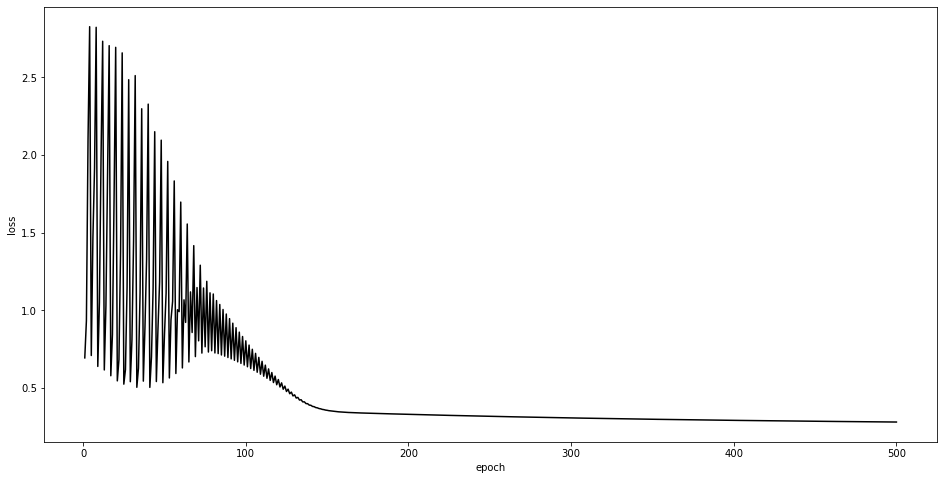

In [112]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
length = loss_list.__len__()
print('The length of loss_list is:',length)
plt.plot(np.arange(1,501,1),loss_list[:500],'black')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 预测

In [113]:
X_vec_test = Variable(torch.FloatTensor(np.array(test_x)))  # N x 30
Y_vec_test = Variable(torch.FloatTensor(np.array(test_y)))  # N x 30
z_test = torch.mm(X_vec_test,w)+b
y_pred = torch.sigmoid(z_test)

In [114]:
y_pred[y_pred>0.5]=1.0
y_pred[y_pred<0.5]=0

In [115]:
test_y.T

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,1,0,1,0,1,1,1,1,1,0,...,1,1,1,0,0,0,0,0,0,1


In [116]:
y_pred_np = y_pred.detach().numpy()  # 将其变成向量
y_pred_np = np.squeeze(y_pred_np)  # [1. 1. 1. 0. 1.
print(y_pred_np)
print('shape of y_pred_np',y_pred_np.shape)

[1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1.]
shape of y_pred_np (69,)


In [117]:
accuracy = accuracy_score(y_pred_np,test_y)
print('The accuracy is:',accuracy)

The accuracy is: 0.9130434782608695


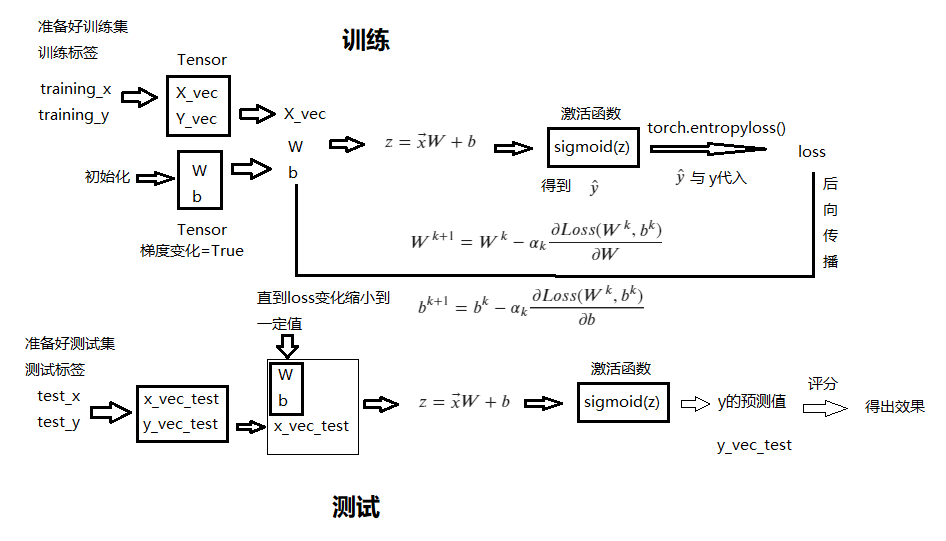